# Complete Notebook

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from tensorflow.keras.applications.resnet import ResNet152
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline 

## Initializing Parameters

In [3]:
IMAGE_SIZE = [224,224, 3]

train_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Train'
test_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Test'
val_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Val'

## Data Augmentation

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


val_set = test_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Val',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3641 images belonging to 2 classes.
Found 455 images belonging to 2 classes.
Found 455 images belonging to 2 classes.


## VGG16

In [5]:
base_model_vgg16 = VGG16(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False, pooling='max')

58892288/58889256 [==============================] - 1s 0us/step


In [6]:
for layer in base_model_vgg16.layers:
    layer.trainable = False

## Building Model

In [7]:
x = base_model_vgg16.output
x = Flatten()(x)
prediction = Dense(2, activation='softmax')(x)
final_model = Model(inputs=base_model_vgg16.input, outputs=prediction)

In [8]:
final_model.compile(
  loss='categorical_crossentropy',
  optimizer='Adam',
  metrics=['accuracy']
)

In [9]:
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Training

In [10]:
history = final_model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

Epoch 1/100
114/114 [==============================] - 256s 2s/step - loss: 0.4361 - accuracy: 0.7959 - val_loss: 0.1751 - val_accuracy: 0.9604
Epoch 2/100
114/114 [==============================] - 163s 1s/step - loss: 0.1557 - accuracy: 0.9650 - val_loss: 0.1214 - val_accuracy: 0.9648
Epoch 3/100
114/114 [==============================] - 166s 1s/step - loss: 0.1074 - accuracy: 0.9687 - val_loss: 0.0981 - val_accuracy: 0.9758
Epoch 4/100
114/114 [==============================] - 165s 1s/step - loss: 0.0910 - accuracy: 0.9765 - val_loss: 0.0925 - val_accuracy: 0.9692
Epoch 5/100
114/114 [==============================] - 164s 1s/step - loss: 0.0849 - accuracy: 0.9732 - val_loss: 0.0753 - val_accuracy: 0.9780
Epoch 6/100
114/114 [==============================] - 164s 1s/step - loss: 0.0680 - accuracy: 0.9773 - val_loss: 0.0705 - val_accuracy: 0.9780
Epoch 7/100
114/114 [==============================] - 165s 1s/step - loss: 0.0570 - accuracy: 0.9861 - val_loss: 0.0670 - val_accuracy:

## Testing

In [11]:
print("Evaluating on test data ....")
results = final_model.evaluate(test_set, batch_size=32)
print("test loss, test acc:", results)

Evaluating on test data ....
15/15 [==============================] - 37s 2s/step - loss: 0.0529 - accuracy: 0.9802
test loss, test acc: [0.0528763122856617, 0.9802197813987732]


## Plotting 

In [12]:
history.history

{'loss': [0.31675291061401367,
  0.14101451635360718,
  0.10459566116333008,
  0.08442877978086472,
  0.07463096082210541,
  0.06631791591644287,
  0.06264223903417587,
  0.05842255428433418,
  0.054030753672122955,
  0.052940484136343,
  0.05099048838019371,
  0.04710988700389862,
  0.042010921984910965,
  0.04641426354646683,
  0.04294077679514885,
  0.04020622745156288,
  0.03712530806660652,
  0.035321224480867386,
  0.040593791753053665,
  0.03491761162877083,
  0.03552928939461708,
  0.03573964908719063,
  0.03570668026804924,
  0.03348414599895477,
  0.0309867225587368,
  0.0313863642513752,
  0.034227404743433,
  0.030418792739510536,
  0.03127416968345642,
  0.02722521685063839,
  0.02874438837170601,
  0.026896439492702484,
  0.028592482209205627,
  0.02785373479127884,
  0.02626149356365204,
  0.029409004375338554,
  0.02787833847105503,
  0.027331490069627762,
  0.025076646357774734,
  0.02710084058344364,
  0.026080304756760597,
  0.023002777248620987,
  0.0236165523529052

### Accuracy vs Epochs

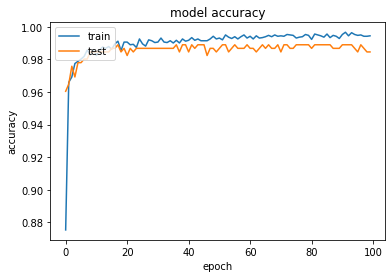

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Loss vs Epochs

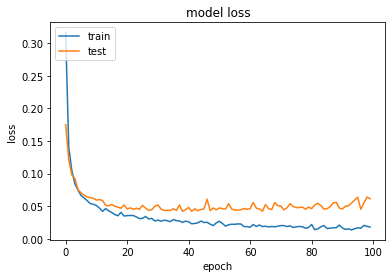

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()